In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [3]:
df=pd.read_csv("Social_Network_Ads.csv")

In [4]:
df.head()


,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

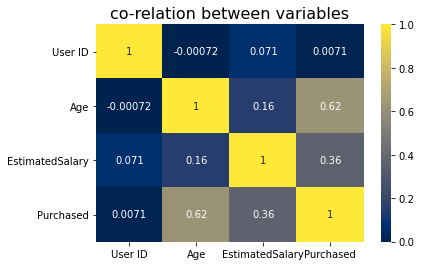

In [6]:
sns.heatmap(df.corr(),annot=True,cmap='cividis')
plt.title('co-relation between variables',fontsize=16)
plt.show()

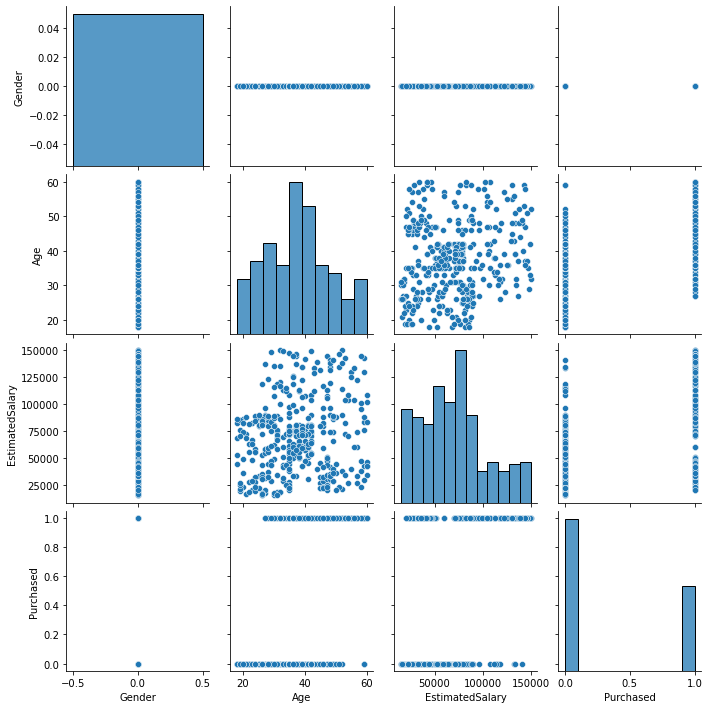

In [41]:
sns.pairplot(df)

Text(0.5, 1.0, 'Estimated Salary')

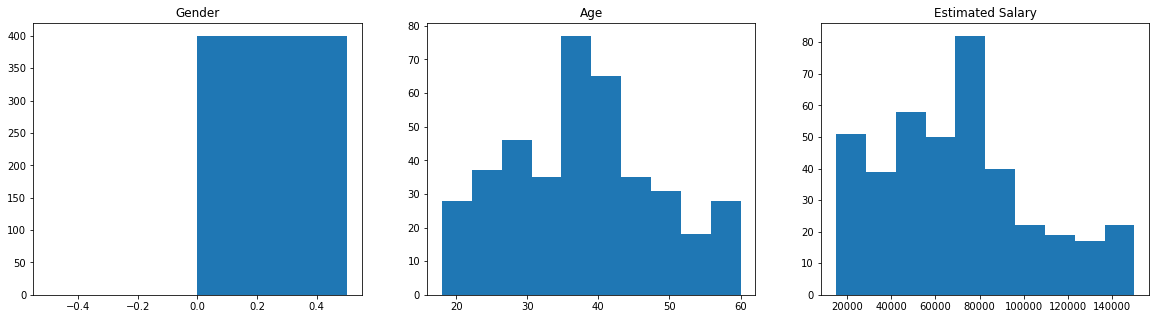

In [42]:
fig, (ax0, ax1,ax2) = plt.subplots(nrows=1, ncols=3, figsize= (20,5))

len_gender = len(df.Gender.unique())


ax0.hist(df.Gender, bins=len_gender+1)
ax0.set_title("Gender")

ax1.hist(df.Age)
ax1.set_title("Age")

ax2.hist(df.EstimatedSalary)
ax2.set_title("Estimated Salary")

In [43]:
df.drop(["User ID"],axis=1,inplace=True) #dropping "user ID" column

KeyError: "['User ID'] not found in axis"

In [44]:
#Assigning 0 and 1 for genders

df.Gender= [1 if each=="Male" else 0 for each in df.Gender]
print (df.Gender)

0      0
1      0
2      0
3      0
4      0
      ..
395    0
396    0
397    0
398    0
399    0
Name: Gender, Length: 400, dtype: int64


In [45]:
X=df.iloc[:, :3]
y=df.iloc[:, 3]

In [46]:
X

,Gender,Age,EstimatedSalary
0,0,19,19000
1,0,35,20000
2,0,26,43000
3,0,27,57000
4,0,19,76000
...,...,...,...
395,0,46,41000
396,0,51,23000
397,0,50,20000
398,0,36,33000


In [47]:
y

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchased, Length: 400, dtype: int64

In [48]:
df

,Gender,Age,EstimatedSalary,Purchased
0,0,19,19000,0
1,0,35,20000,0
2,0,26,43000,0
3,0,27,57000,0
4,0,19,76000,0
...,...,...,...,...
395,0,46,41000,1
396,0,51,23000,1
397,0,50,20000,1
398,0,36,33000,0


In [49]:
from sklearn.model_selection import train_test_split
train_X, val_X, train_y, val_y = train_test_split(X, y, test_size=0.2, random_state = 0)

In [50]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(train_X, train_y)

LogisticRegression(random_state=0)

In [51]:
y_pred = classifier.predict(val_X)
print(((y_pred,1), (val_y,1)),1)

((array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64), 1), (132    0
309    0
341    0
196    0
246    0
      ..
14     0
363    0
304    0
361    1
329    1
Name: Purchased, Length: 80, dtype: int64, 1)) 1


In [52]:


from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(val_y, y_pred)
print(cm)
accuracy_score(val_y, y_pred)

[[58  0]
 [22  0]]


0.725